In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1.Data cleaning
# 2.EDA
# 3.Text preprosessing
# 4.model building
# 5.Evaluation
# 6.Improvement
# 7.Website
# 8.Deploy

#  1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.sample(5)

,target,text
204,0,U call me alter at 11 ok.
3685,0,I get out of class in bsn in like &lt;#&gt; ...
3160,0,Mystery solved! Just opened my email and he's ...
2922,0,Fine am simply sitting.
3844,0,Mmmm.... I cant wait to lick it!


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int32 
 1   text    5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#check for duplicate values
df.duplicated().sum()

403

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

#  2.EDA

In [19]:
# how many msg are spam and how many is ham
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

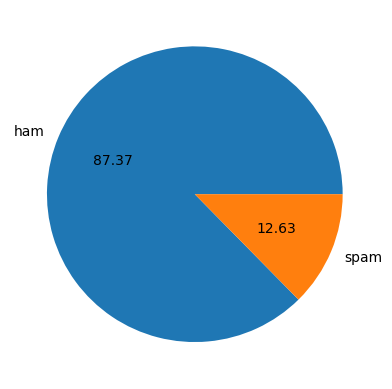

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
#--->we clearly see data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Riya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#now we get idea about no of character in sms,no of words in sms,no of character in sms

In [25]:
df['num_characters']=df['text'].apply(len)

C:\Users\Riya\AppData\Local\Temp\ipykernel_9708\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [26]:
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [27]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\Riya\AppData\Local\Temp\ipykernel_9708\3771813659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [28]:
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Riya\AppData\Local\Temp\ipykernel_9708\3187438238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [29]:
df

,target,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [30]:
df[['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
df[df['target']==0][['num_characters','num_words','num_sen']].describe() #describe for ham msg

,num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
df[df['target']==1][['num_characters','num_words','num_sen']].describe() #describe for spam msg

,num_characters,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

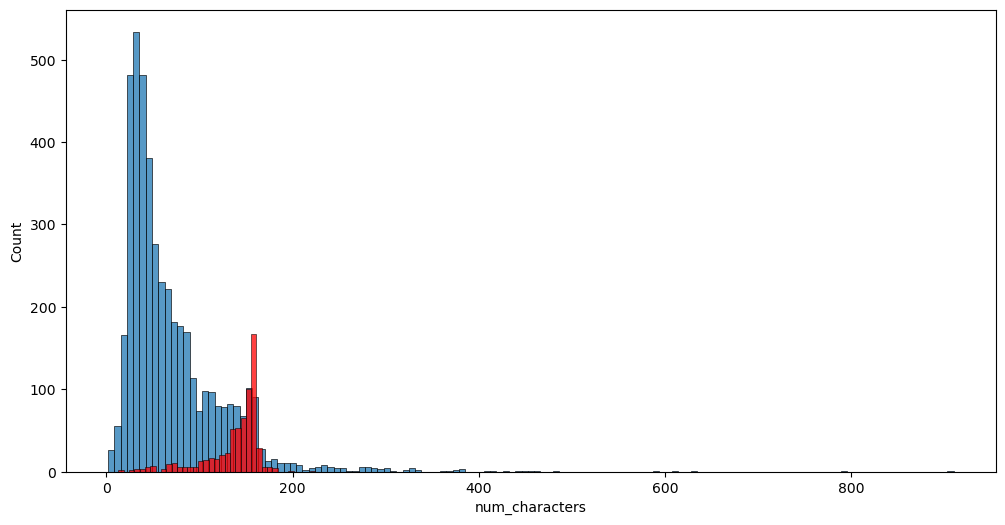

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

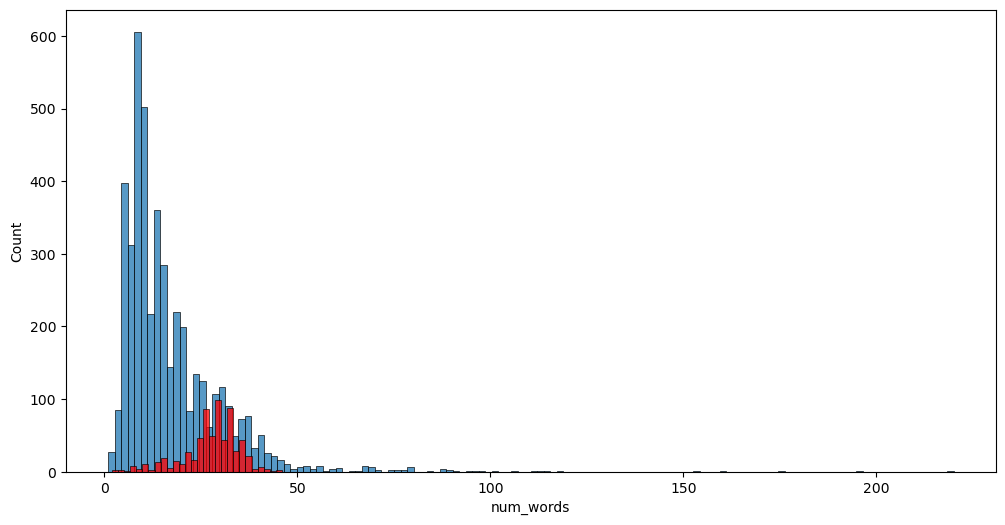

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

In [36]:
#----> we can purely see that ham msg is made of lesser no of characters and words and spam msg made of more no of words and characters

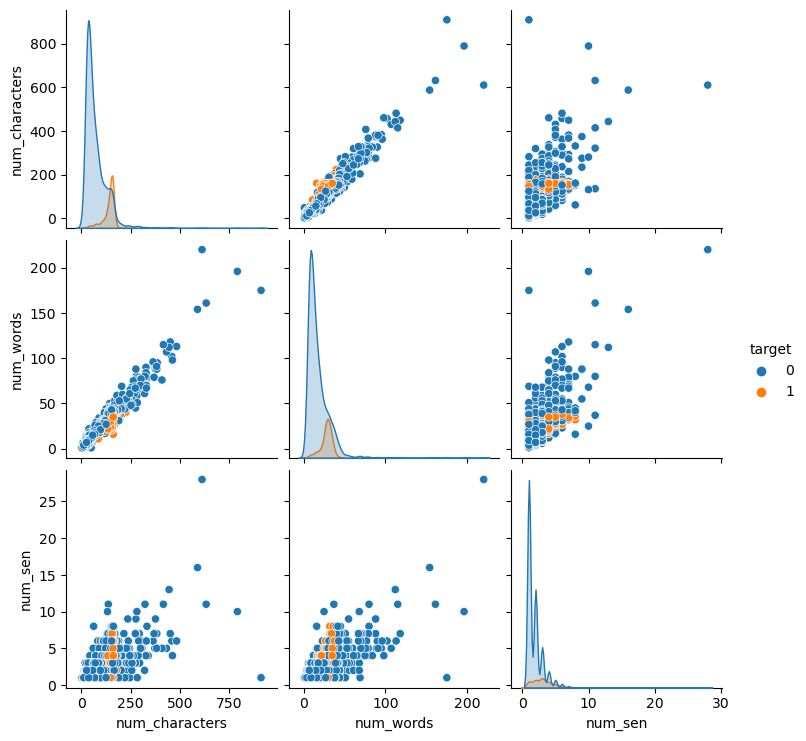

In [37]:
sns.pairplot(df,hue='target')

C:\Users\Riya\AppData\Local\Temp\ipykernel_9708\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

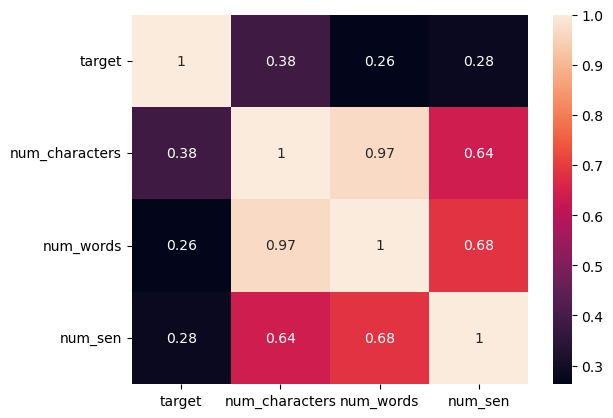

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
#we can see their is multi colinearity in the data so we keep the num_characters column because it has high corlation with target

#  3.Data Preprocessing

In [40]:
# 1.Lower case
# 2.Tokenize(we break our sentence into words)
# 3.Removal of special characters
# 4.removal of stop words and punctuatuion
# 5.stemming

In [41]:
from nltk.corpus import stopwords
# stopwords.words('english')

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [44]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [45]:
transform_text(df['text'][2000])

'b go 2 sch mon si need 2 take smth'

In [46]:
# nltk.download()

In [47]:
transform_text('Did you Like my presentation?')

'like present'

In [48]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\Riya\AppData\Local\Temp\ipykernel_9708\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [49]:
df.head()

,target,text,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
# !pip install wordcloud

In [51]:
from wordcloud import WordCloud

In [52]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

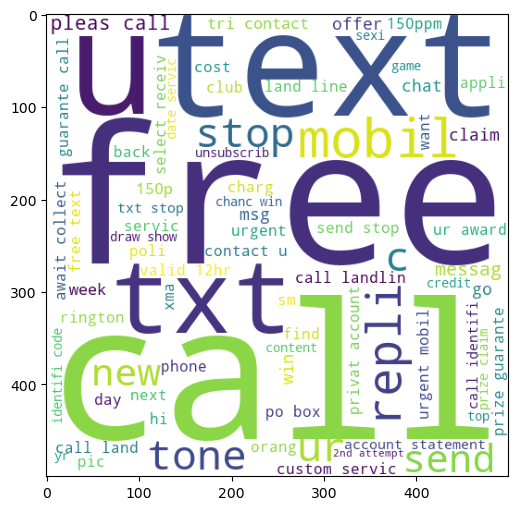

In [54]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [55]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

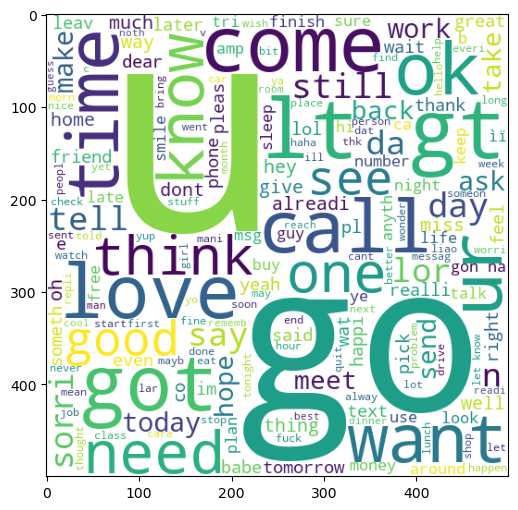

In [56]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [57]:
df.head()

,target,text,num_characters,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [59]:
len(spam_corpus)

9939

In [60]:
from collections import Counter

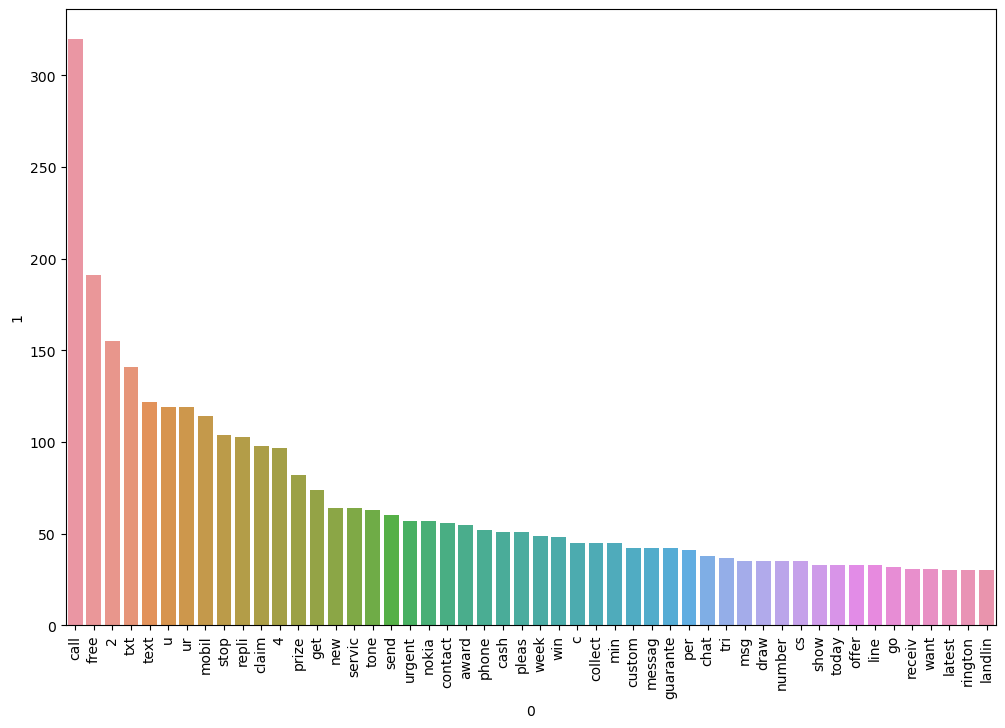

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(50))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

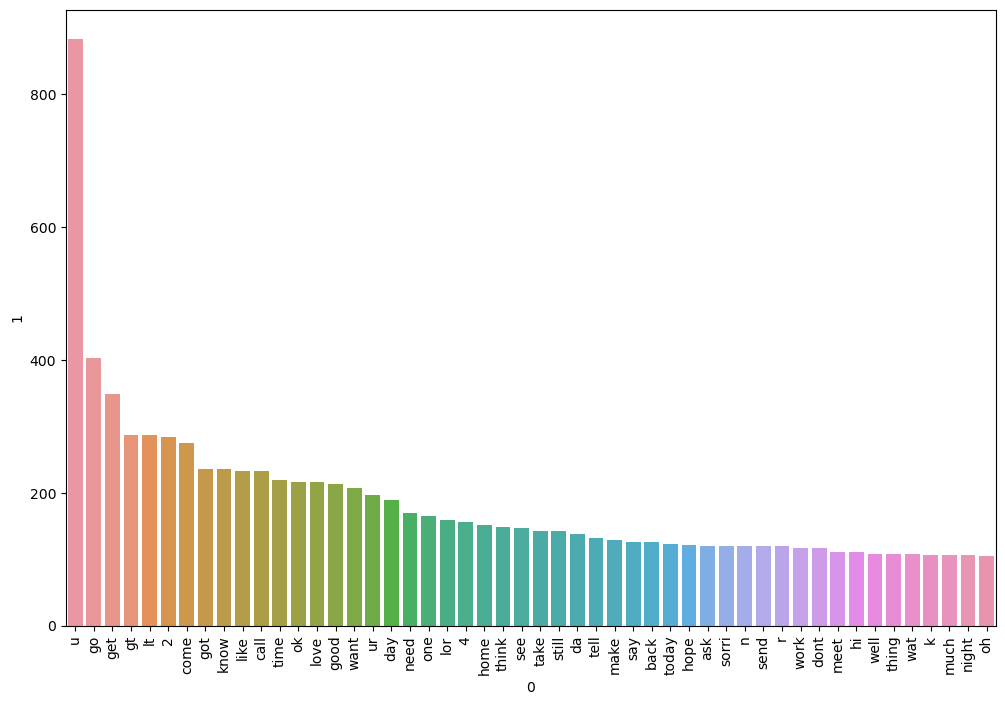

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(50))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [64]:
#we first build the model on naive bias because it gave better performence in textual data.but naive bias required the neumerical data so convert textual data into neumerical data by vectorization


In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [121]:
cv=CountVectorizer()
tfidf = TfidfVectorizer()

In [67]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 6708)

In [69]:
y=df['target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [73]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [74]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [76]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [77]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [122]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [124]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [125]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
X.shape

(5169, 6708)

In [127]:
y=df['target'].values

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [131]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [132]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[786 110]
 [ 18 120]]
0.5217391304347826


In [133]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9690522243713733
[[876  20]
 [ 12 126]]
0.863013698630137


In [134]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [135]:
!pip install xgboost

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble  import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [137]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [138]:
clfs={
    'SVC':svc,
    "kn":knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'Bgc':bc,
    'GBDT':gbdt,
    'ETC':etc,
    'XGB':xgb
}

In [139]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [140]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9700193423597679, 0.9349593495934959)

In [141]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For: ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For:  SVC
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959
For:  kn
Accuracy -  0.8965183752417795
Precision -  1.0
For:  NB
Accuracy -  0.9690522243713733
Precision -  0.863013698630137
For:  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For:  LR
Accuracy -  0.9661508704061895
Precision -  0.9478260869565217
For:  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For:  Adaboost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For:  Bgc
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For:  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For:  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For:  XGB
Accuracy -  0.9690522243713733
Precision -  0.9344262295081968


In [96]:
performence_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [97]:
performence_df

,Algorithm,Accuracy,Precision
0,SVC,0.972921,0.974138
1,kn,0.900387,1.000000
2,NB,0.959381,1.000000
3,DT,0.935203,0.838095
4,LR,0.951644,0.940000
5,RF,0.973888,1.000000
6,Adaboost,0.961315,0.945455
7,Bgc,0.958414,0.862595
8,GBDT,0.952611,0.923810
9,ETC,0.975822,0.982906


In [98]:
performence_df1=pd.melt(performence_df,id_vars='Algorithm')

In [99]:
performence_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.972921
1,kn,Accuracy,0.900387
2,NB,Accuracy,0.959381
3,DT,Accuracy,0.935203
4,LR,Accuracy,0.951644
5,RF,Accuracy,0.973888
6,Adaboost,Accuracy,0.961315
7,Bgc,Accuracy,0.958414
8,GBDT,Accuracy,0.952611
9,ETC,Accuracy,0.975822


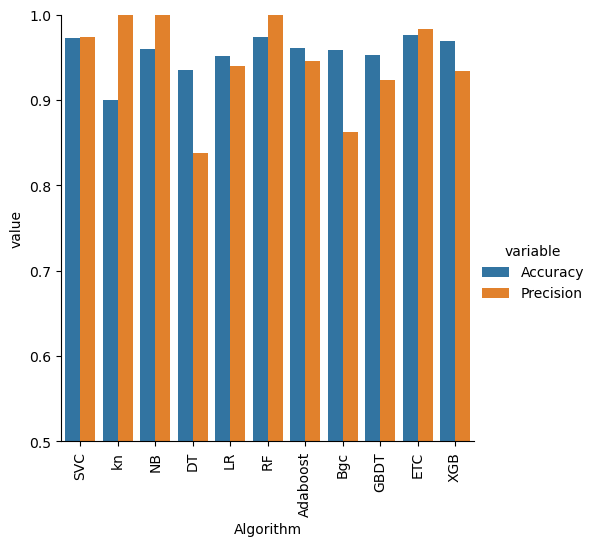

In [100]:
sns.catplot(x="Algorithm",y='value',hue='variable',data=performence_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

#  Improve our model

In [ ]:
#change the max feature parameter in tfidf

In [119]:
temp_df_max_ft_3000=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [120]:
temp_df_max_ft_3000

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790
1,kn,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.929400,0.828283
4,LR,0.958414,0.970297
5,RF,0.974855,0.982759
6,Adaboost,0.960348,0.929204
7,Bgc,0.957447,0.867188
8,GBDT,0.947776,0.920000
9,ETC,0.974855,0.974576


In [142]:
new_df=performence_df.merge(temp_df_max_ft_3000,on='Algorithm')

In [143]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.972921,0.974138,0.975822,0.974790
1,kn,0.900387,1.000000,0.905222,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000
3,DT,0.935203,0.838095,0.929400,0.828283
4,LR,0.951644,0.940000,0.958414,0.970297
5,RF,0.973888,1.000000,0.974855,0.982759
6,Adaboost,0.961315,0.945455,0.960348,0.929204
7,Bgc,0.958414,0.862595,0.957447,0.867188
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,ETC,0.975822,0.982906,0.974855,0.974576


In [144]:
temp_df_scaled=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scalling':accuracy_scores,'Precision_scalling':precision_scores})

In [145]:
temp_df_scaled

,Algorithm,Accuracy_scalling,Precision_scalling
0,SVC,0.970019,0.934959
1,kn,0.896518,1.000000
2,NB,0.969052,0.863014
3,DT,0.935203,0.838095
4,LR,0.966151,0.947826
5,RF,0.973888,1.000000
6,Adaboost,0.961315,0.945455
7,Bgc,0.958414,0.862595
8,GBDT,0.952611,0.923810
9,ETC,0.975822,0.982906


In [146]:
new_df1=new_df.merge(temp_df_scaled,on='Algorithm')

In [147]:
new_df1

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scalling,Precision_scalling
0,SVC,0.972921,0.974138,0.975822,0.974790,0.970019,0.934959
1,kn,0.900387,1.000000,0.905222,1.000000,0.896518,1.000000
2,NB,0.959381,1.000000,0.970986,1.000000,0.969052,0.863014
3,DT,0.935203,0.838095,0.929400,0.828283,0.935203,0.838095
4,LR,0.951644,0.940000,0.958414,0.970297,0.966151,0.947826
5,RF,0.973888,1.000000,0.974855,0.982759,0.973888,1.000000
6,Adaboost,0.961315,0.945455,0.960348,0.929204,0.961315,0.945455
7,Bgc,0.958414,0.862595,0.957447,0.867188,0.958414,0.862595
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.952611,0.923810
9,ETC,0.975822,0.982906,0.974855,0.974576,0.975822,0.982906


In [149]:
#voting classifier
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
mnb=MultinomialNB()

from sklearn.ensemble import VotingClassifier

In [151]:
vc=VotingClassifier(estimators=[('svm',svc),('rfc',rfc),('etc',etc),('mnb',mnb)],voting='soft')

In [152]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('mnb', MultinomialNB())],
                 voting='soft')

In [153]:
y_pred=vc.predict(X_test)

In [155]:
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [156]:
#Applying stacking
estimators=[('svm',svc),('rfc',rfc),('etc',etc),('mnb',mnb)]
final_estimator=RandomForestClassifier()

In [157]:
from sklearn.ensemble import StackingClassifier

In [158]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [159]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9402985074626866


In [160]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))